The goal of this notebook is to investigate the convergence of the mean survival time as a function of the sample size. We'll record survival times for a large number of messages, and then plot a running average against the number of messages involved.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib widget

In [7]:
n=100
A = np.zeros((n,n), dtype=int)
for i in range(n):
    for j in range(n):
        A[i,j] = np.random.choice([0,1])

print(A)

[[1 1 1 ... 1 0 0]
 [0 1 1 ... 1 0 0]
 [1 0 1 ... 0 1 1]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [0 1 1 ... 0 1 0]]


In [8]:
# Gives a random binary vector
def get_b(n):
    return np.array( [np.random.choice([complex("0"),complex("1")], p=[0.9, 0.1]) for i in range(n)] )

# In place, randomly selects an entry of 1 in b and replaces it with 1j.
def inject_tracker(b):
    support = [i for i in range(b.shape[0]) if b[i,] ]
    node = np.random.choice(support)
    b[node,] = complex("j")

# The collision function. The input is a vector y = Ax + b
def f(y):
    # We multiply each entry of y by the indicator that there is only one message at the corresponding node 
    return np.array( [ y[i,]*(y[i,].real + y[i,].imag == 1) for i in range(y.shape[0]) ] )

In [5]:
# Initialize external parameters
survival_times = dict()
alpha = 0
need_injection = True
sample_size = 10000

# Initialize dynamical parameters (t=0)
x = get_b(n)

# This is the main loop
while alpha < sample_size:
    # Get b_t
    b = get_b(n)

    # If it is possible and necessary to inject a tracker, do so, and update values accordingly
    if (np.sum(b) > 0) and need_injection:
        inject_tracker(b)
        need_injection = False
        alpha += 1
        survival_times[alpha] = 1
    
    # Calculate the next state
    x = f(np.matmul(A,x) + b)

    # Check if message alpha has survived, and if so, update accordingly
    if complex("j") in x:
        survival_times[alpha] += 1
    else:
        need_injection = True

In [6]:
# This is where we plot
alphas = np.array(list(survival_times.keys()))
times = np.array([survival_times[alpha] for alpha in survival_times.keys()])
mean_times = np.cumsum(times) / alphas

Text(0.5, 1.0, 'Mean Survival Time vs. Sample Size for ER')

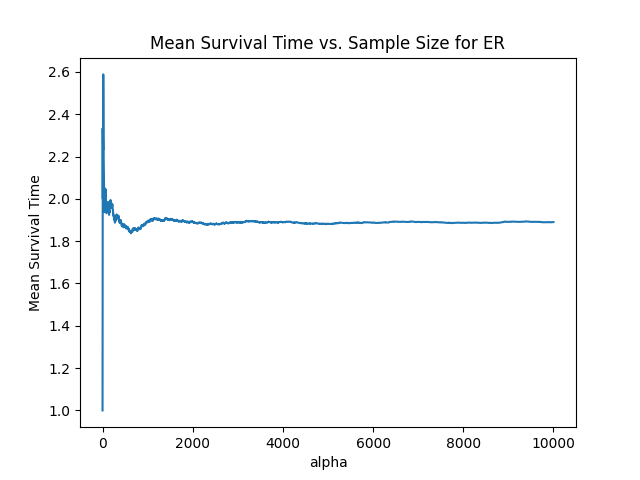

In [7]:
plt.figure()
plt.plot(alphas, mean_times)
plt.xlabel("alpha")
plt.ylabel("Mean Survival Time")
plt.title("Mean Survival Time vs. Sample Size for ER")

In [8]:
mean_times[9999]

1.8901

Well. that's about what I expected. Let's try it again with a directed cycle graph and see if we get the same results.

In [9]:
A = np.zeros((n,n))
for j in range(n):
    A[(j+1)%n,j] = 1

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


In [10]:
# Initialize external parameters
survival_times = dict()
alpha = 0
need_injection = True
sample_size = 10000

# Initialize dynamical parameters (t=0)
x = get_b(n)

# This is the main loop
while alpha < sample_size:
    # Get b_t
    b = get_b(n)

    # If it is possible and necessary to inject a tracker, do so, and update values accordingly
    if (np.sum(b) > 0) and need_injection:
        inject_tracker(b)
        need_injection = False
        alpha += 1
        survival_times[alpha] = 1
    
    # Calculate the next state
    x = f(np.matmul(A,x) + b)

    # Check if message alpha has survived, and if so, update accordingly
    if complex("j") in x:
        survival_times[alpha] += 1
    else:
        need_injection = True

Text(0.5, 1.0, 'Mean Survival Time vs. Sample Size for Cycle')

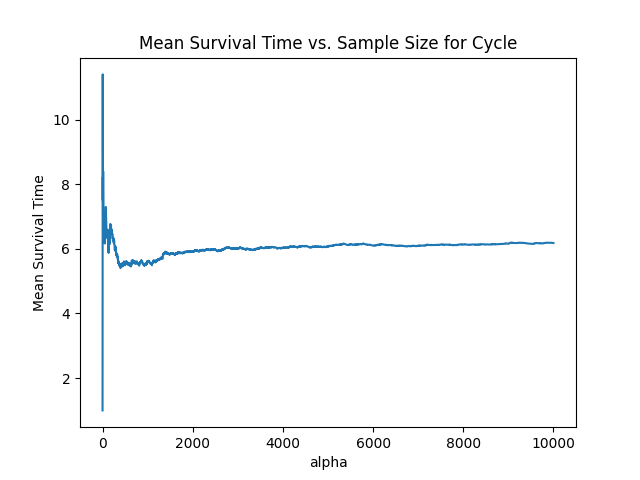

In [11]:
# This is where we plot
alphas = np.array(list(survival_times.keys()))
times = np.array([survival_times[alpha] for alpha in survival_times.keys()])
mean_times = np.cumsum(times) / alphas

plt.figure()
plt.plot(alphas, mean_times)
plt.xlabel("alpha")
plt.ylabel("Mean Survival Time")
plt.title("Mean Survival Time vs. Sample Size for Cycle")

In [12]:
mean_times[9999]

6.1805

What about the graph that consists of only loops?

In [13]:
A = np.zeros((n,n))
for i in range(n):
    A[i,i] = 1

In [14]:
# Initialize external parameters
survival_times = dict()
alpha = 0
need_injection = True
sample_size = 10000

# Initialize dynamical parameters (t=0)
x = get_b(n)

# This is the main loop
while alpha < sample_size:
    # Get b_t
    b = get_b(n)

    # If it is possible and necessary to inject a tracker, do so, and update values accordingly
    if (np.sum(b) > 0) and need_injection:
        inject_tracker(b)
        need_injection = False
        alpha += 1
        survival_times[alpha] = 1
    
    # Calculate the next state
    x = f(np.matmul(A,x) + b)

    # Check if message alpha has survived, and if so, update accordingly
    if complex("j") in x:
        survival_times[alpha] += 1
    else:
        need_injection = True

Text(0.5, 1.0, 'Mean Survival Time vs. Sample Size for Loops-Only')

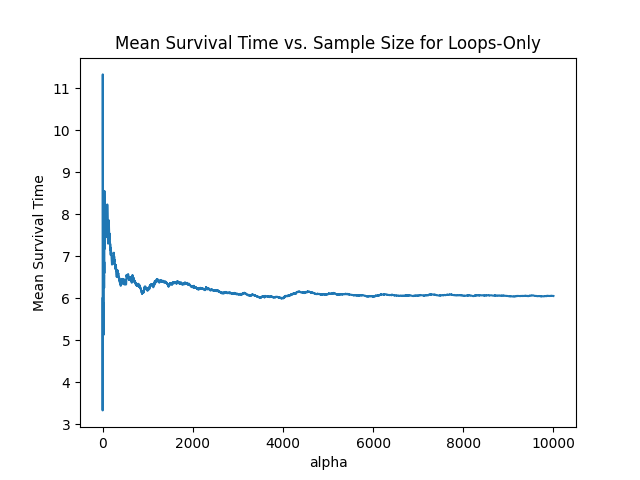

In [15]:
# This is where we plot
alphas = np.array(list(survival_times.keys()))
times = np.array([survival_times[alpha] for alpha in survival_times.keys()])
mean_times = np.cumsum(times) / alphas

plt.figure()
plt.plot(alphas, mean_times)
plt.xlabel("alpha")
plt.ylabel("Mean Survival Time")
plt.title("Mean Survival Time vs. Sample Size for Loops-Only")

In [16]:
mean_times[9999]

6.0585

In [17]:
A = np.ones((n,n))

In [18]:
# Initialize external parameters
survival_times = dict()
alpha = 0
need_injection = True
sample_size = 10000

# Initialize dynamical parameters (t=0)
x = get_b(n)

# This is the main loop
while alpha < sample_size:
    # Get b_t
    b = get_b(n)

    # If it is possible and necessary to inject a tracker, do so, and update values accordingly
    if (np.sum(b) > 0) and need_injection:
        inject_tracker(b)
        need_injection = False
        alpha += 1
        survival_times[alpha] = 1
    
    # Calculate the next state
    x = f(np.matmul(A,x) + b)

    # Check if message alpha has survived, and if so, update accordingly
    if complex("j") in x:
        survival_times[alpha] += 1
    else:
        need_injection = True

Text(0.5, 1.0, 'Mean Survival Time vs. Sample Size for Complete Graph')

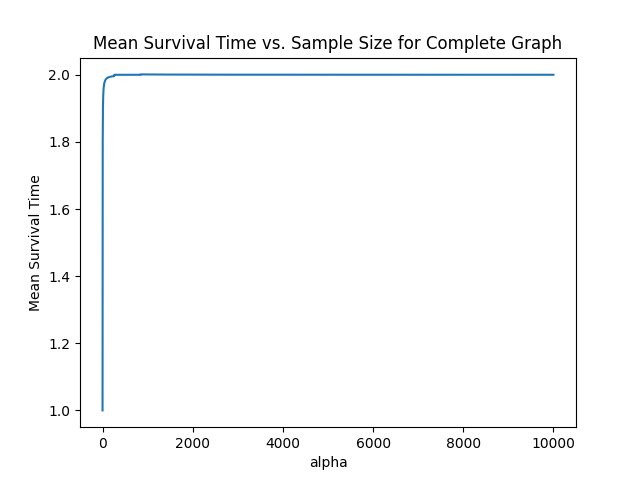

In [19]:
# This is where we plot
alphas = np.array(list(survival_times.keys()))
times = np.array([survival_times[alpha] for alpha in survival_times.keys()])
mean_times = np.cumsum(times) / alphas

plt.figure()
plt.plot(alphas, mean_times)
plt.xlabel("alpha")
plt.ylabel("Mean Survival Time")
plt.title("Mean Survival Time vs. Sample Size for Complete Graph")

In [20]:
mean_times[9999]

2.0001

In [9]:
n=100
for w in range(1,20):
    W = w/20
    A = np.zeros((n,n), dtype=int)
    for i in range(n):
        for j in range(n):
            A[i,j] = np.random.choice([0,1], p=[1-W, W])
    
    # Initialize external parameters
    survival_times = dict()
    alpha = 0
    need_injection = True
    sample_size = 5000

    # Initialize dynamical parameters (t=0)
    x = get_b(n)

    # This is the main loop
    while alpha < sample_size:
        # Get b_t
        b = get_b(n)

        # If it is possible and necessary to inject a tracker, do so, and update values accordingly
        if (np.sum(b) > 0) and need_injection:
            inject_tracker(b)
            need_injection = False
            alpha += 1
            survival_times[alpha] = 1

        # Calculate the next state
        x = f(np.matmul(A,x) + b)

        # Check if message alpha has survived, and if so, update accordingly
        if complex("j") in x:
            survival_times[alpha] += 1
        else:
            need_injection = True
        
    alphas = np.array(list(survival_times.keys()))
    times = np.array([survival_times[alpha] for alpha in survival_times.keys()])
    mean_times = np.cumsum(times) / alphas

    print("W = " + str(W))
    print(mean_times[4999])
    print()

    
    
    
    

W = 0.05
2.0118

W = 0.1
1.748

W = 0.15
1.9212

W = 0.2
2.1258

W = 0.25
2.112

W = 0.3
2.0212

W = 0.35
1.961

W = 0.4
1.9308

W = 0.45
1.8834

W = 0.5
1.8556

W = 0.55
1.8804

W = 0.6
1.8952

W = 0.65
1.9248

W = 0.7
1.952

W = 0.75
1.9668

W = 0.8
1.9816

W = 0.85
2.0018

W = 0.9
1.9946

W = 0.95
1.996

